In [2]:
import torch
import torch.nn as nn
import numpy as np

In [3]:
np.random.seed(42)
n_samples = 1000
x = np.random.rand(n_samples,1)
y = np.random.choice([0,1], size=(n_samples,), p = [0.5,0.5])

x

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

In [4]:
x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

x_tensor

tensor([[0.3745],
        [0.9507],
        [0.7320],
        [0.5987],
        [0.1560],
        [0.1560],
        [0.0581],
        [0.8662],
        [0.6011],
        [0.7081],
        [0.0206],
        [0.9699],
        [0.8324],
        [0.2123],
        [0.1818],
        [0.1834],
        [0.3042],
        [0.5248],
        [0.4319],
        [0.2912],
        [0.6119],
        [0.1395],
        [0.2921],
        [0.3664],
        [0.4561],
        [0.7852],
        [0.1997],
        [0.5142],
        [0.5924],
        [0.0465],
        [0.6075],
        [0.1705],
        [0.0651],
        [0.9489],
        [0.9656],
        [0.8084],
        [0.3046],
        [0.0977],
        [0.6842],
        [0.4402],
        [0.1220],
        [0.4952],
        [0.0344],
        [0.9093],
        [0.2588],
        [0.6625],
        [0.3117],
        [0.5201],
        [0.5467],
        [0.1849],
        [0.9696],
        [0.7751],
        [0.9395],
        [0.8948],
        [0.5979],
        [0

In [5]:
a =torch.tensor(1.0,requires_grad=True)
b = torch.tensor(-9.0,requires_grad=True)

step_size = 0.1
loss = []
n_iter = 30

In [6]:
def foward(x):
    return a + b*x


In [7]:
for i in range(n_iter):
    Y_pred = foward(x_tensor)
    torch.sigmoid(Y_pred)

In [12]:
import torch
import torch.nn.functional as F
import numpy as np

# Generate toy data
np.random.seed(0)
torch.manual_seed(0)

N = 1000
x = np.random.rand(N, 1)
y = (x > 0.5).astype(float)

x = torch.tensor(x, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# Initialize parameters
beta1 = torch.randn(1, requires_grad=True)
beta2 = torch.randn(1, requires_grad=True)
learning_rate = 0.1
num_epochs = 1000

# Logistic function
def logistic(x, beta1, beta2):
    return 1 / (1 + torch.exp(-(beta1 + beta2 * x)))

# Training loop
for epoch in range(num_epochs):
    # Calculate predictions
    y_pred = logistic(x, beta1, beta2)
    
    # Calculate the negative log-likelihood loss
    loss = -torch.mean(y * torch.log(y_pred) + (1 - y) * torch.log(1 - y_pred))
    
    # Compute gradients
    loss.backward()
    
    # Update parameters using SGD
    with torch.no_grad():
        beta1 -= learning_rate * beta1.grad
        beta2 -= learning_rate * beta2.grad
    
    # Zero the gradients after updating
    beta1.grad.zero_()
    beta2.grad.zero_()
    
    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item()}')

print(f'Optimal Parameters: beta1 = {beta1.item()}, beta2 = {beta2.item()}')

from azureml.core import Environment

from azureml.core import Workspace, Dataset

# get/create experiment
ws = Workspace.from_config()

# get dataset
dataset = Dataset.get_by_name(ws, name='dataset_name')
dataset.download(target_path='.', overwrite=False)


Epoch 100/1000, Loss: 0.6709359884262085
Epoch 200/1000, Loss: 0.5697512626647949
Epoch 300/1000, Loss: 0.4965440630912781
Epoch 400/1000, Loss: 0.4421001076698303
Epoch 500/1000, Loss: 0.4005070924758911
Epoch 600/1000, Loss: 0.3678895831108093
Epoch 700/1000, Loss: 0.3416972756385803
Epoch 800/1000, Loss: 0.32022175192832947
Epoch 900/1000, Loss: 0.30229273438453674
Epoch 1000/1000, Loss: 0.28708887100219727
Optimal Parameters: beta1 = -2.5592784881591797, beta2 = 5.191551685333252


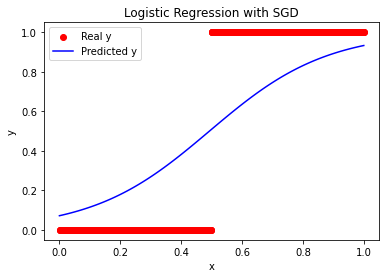

In [14]:
import matplotlib.pyplot as plt
x_plot = torch.linspace(0, 1, 100).reshape(-1, 1)
y_plot = logistic(x_plot, beta1, beta2).detach().numpy()

plt.scatter(x.numpy(), y.numpy(), color='red', label='Real y')
plt.plot(x_plot.numpy(), y_plot, color='blue', label='Predicted y')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Logistic Regression with SGD')
plt.show()